11912705 黄松昊
Naive_Bayes

# please read ReadMe file before testing


#DataSet: using data from both minist website and Class
#classifier: 0-9 classifier

# steps for Naive_Bayes

# 1. img data pre-process (Binarization,scale(0,1),align)
# 2. training Naive_Bayes model (4 models)
# 4. testing & showing
# 5. performance on different Naive_Bayes



import packages

In [1]:
import gzip
import copy
import numpy as np
import time
from sklearn import preprocessing
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

variations declaration
28*28, 2840 training data, 900 testing data, labels from 0-9

In [2]:
image_size  = 28

num_labels = 10

num_train = 2840

num_test = 900


functions used for pre-processing data

In [3]:
def show_pic(img):
    image = np.asarray(img).squeeze()
    plt.imshow(image,'gray')
    plt.show()


# Binarization one img function set valve to creating 0\1 data, two datasets to two ways
def Binarization(img_data,valve):
    img = copy.deepcopy(img_data)
    if valve == 230:
        for i in range(len(img)):
            if img[i] <= valve:
                img[i] = 0
            else:
                img[i] = 255
    elif valve == 0:
        for i in range(len(img)):
            if img[i] > valve:
                img[i] = 255
            else:
                img[i] = 0
    return img


# normalization,scale to (0,1)
#def scale(X_train,X_test):
    #min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
    #x_minmax_training = min_max_scaler.fit_transform(X_train)
    #x_minmax_testing = min_max_scaler.fit_transform(X_test)
    #return x_minmax_training,x_minmax_testing

# normalization,scale to (0,1)
def scale(X_train,X_test):
    X1 = copy.deepcopy(X_train)
    X2 = copy.deepcopy(X_test)
    for i in range(len(X1)):
        X1[i] = X1[i]/np.max(X1[i],axis=0)
    for i in range(len(X2)):
        X2[i] = X2[i]/np.max(X2[i],axis=0)
    return X1,X2


# picture number ceter alignment
def align(img_data,kind):
    img = copy.deepcopy(img_data)
    row = 0
    col = 0
    sum_of_1 = 0

    if kind == 0: # means data from web, which don't need to align
        return img

    elif kind == 230: # means data from bb
        for i in range(len(img)):
            for j in range(len(img[i])):
                col+=j*(255-img[i][j])
                row+=i*(255-img[i][j])
        for i in range(len(img)):
            sum_of_1 += np.sum(255-img[i])

    col = col/sum_of_1
    row = row/sum_of_1

    img = np.roll(img,int(np.around(13.5-col)),axis=1)
    img = np.roll(img,int(np.around(13.5-row)),axis=0)

    return img



Reading DataSet and pre-processing
training data stored in 3 ways, same as testing data
#  X_train: raw data(2840*784)
#  X_train01: 0,1 data(2840*784)
#  x_minmax_training: (0,1) data(2840*784)
#  y_train: labels from 0-9(1*2840)

In [36]:


kind = 230 # 230: dataset from bb , 0: dataset from web



In [37]:
# start counting
start = time.perf_counter()

if kind == 0: # load training data from web
    f = gzip.open('train-images-idx3-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('train-me338-2840-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_train)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_train, image_size, image_size, 1)
X_train = []
X_train01 = []

for i in range(num_train):
    X_train.append(align(data[i],kind).ravel())
    X_train01.append(Binarization(X_train[i],kind))

# convert to numpy array
X_train01 = np.array(X_train01)
X_train = np.array(X_train)

if kind == 0: # load training data from web
    f = gzip.open('train-labels-idx1-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('train-me338-2840-labels-idx1-ubyte.gz','r')

f.read(8)
y_train = []
for i in range(num_train):
    buf = f.read(1)
    y_train.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))

y_train = np.array(y_train)       # convert to numpy
y_train = y_train.ravel()


############################################


#  load testing data stored in arrays  t10k-labels-idx1-ubyte
if kind == 0: # load training data from web
    f = gzip.open('t10k-images-idx3-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('test-me338-900-images-idx3-ubyte.gz','r')

f.read(16)
buf = f.read(image_size * image_size * num_test)
data2 = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data2 = data2.reshape(num_test, image_size, image_size, 1)


X_test = []
X_test01 = []

for i in range(num_test):
    X_test.append(align(data2[i],kind).ravel())
    X_test01.append(Binarization(X_test[i],kind))

X_test01 = np.array(X_test01)    # convert to numpy
X_test = np.array(X_test)



if kind == 0: # load data from web
    f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
elif kind == 230:
    f = gzip.open('test-me338-900-labels-idx1-ubyte.gz','r')

f.read(8)
y_test = []
for i in range(num_test):
    buf = f.read(1)
    y_test.append(np.frombuffer(buf, dtype=np.uint8).astype(np.int64))
y_test = np.array(y_test)
y_test = y_test.ravel()


#  Scale down
#  x_minmax_training: (0,1) data(2840*784)
#  x_minmax_testing: (0,1) data(900*784)
x_minmax_training,x_minmax_testing = scale(X_train,X_test)

# end time counter
end = time.perf_counter()
print("time for loading and processing training and testing dataset = %f" % (end-start))

time for loading and processing training and testing dataset = 42.215316


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         

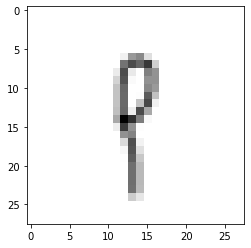

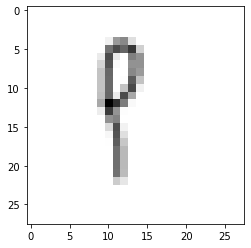

In [44]:
print(x_minmax_training[0])
a = np.array(x_minmax_training[0])
a = np.reshape(a,(28,28))
show_pic(a)

show_pic(data[0])



My simple Navie Bayes base on Bernoulli

In [38]:
# record error rate for numbers
error_count1 = [0,0,0,0,0,0,0,0,0,0]


# store running time and accuracy
testing_data_time = []
training_data_time = []
training_time = []
training_accuracy = []
testing_accuracy = []


#  training function
def simple_Bayes_model(X,y_training):
    X_training = copy.deepcopy(X)
    probs = np.ones((num_labels,image_size*image_size))
    label_count = np.array([0,0,0,0,0,0,0,0,0,0])
    for i in range(len(X_training)):
        for j in range(len(X_training[0])):
            if kind == 0:
                if X_training[i][j] == 255:
                    probs[y_training[i]][j] = probs[y_training[i]][j]+1
            else:
                if X_training[i][j] == 0:
                    probs[y_training[i]][j] = probs[y_training[i]][j]+1
        label_count[y_training[i]]+=1
    for j in range(len(probs)):
        probs[j]  =  probs[j]/(label_count[j]+2)
    label_count = label_count/num_train
    return probs,label_count


# train my simple bayes and measure training time #
start = time.perf_counter()

probs,prior= simple_Bayes_model(X_train01,y_train)

end = time.perf_counter()

training_time.append((end-start))
print("time for training my simple bayes = %f" % (end-start))



time for training my simple bayes = 5.960646



testing my simple bayes model

In [39]:
#function to test my simple bayes#

def testing_simple_model(X,probs):
    class_probs=[]
    sum1 = 0
    X_testing = copy.deepcopy(X)
    for i in range(len(probs)):
        for j in range(len(probs[0])):
            if kind == 0:
                if X_testing[j] == 0:
                    sum1 = sum1 + np.log(1-probs[i][j])
                elif X_testing[j] == 255:
                    sum1 = sum1 + np.log(probs[i][j])
            else:
                if X_testing[j] == 0:
                    sum1 = sum1 + np.log(probs[i][j])
                elif X_testing[j] == 255:
                    sum1 = sum1 + np.log(1-probs[i][j])

        sum1 = sum1 + np.log(prior[i])
        class_probs.append(sum1)
        sum1 = 0
    return class_probs


#test my simple bayes and measure time for testing data and training data#
start = time.perf_counter()
error = 0
for i in range(len(X_test01)):
    li = testing_simple_model(X_test01[i],probs)
    if y_test[i] != li.index(max(li)):
        error += 1
        error_count1[y_test[i]] += 1
end = time.perf_counter()
print("testing data accuracy for my simple bayes = %f" % (1-(error/num_test)))
testing_data_time.append((end-start))
testing_accuracy.append((1-error/num_test))
print("time for testing my simple bayes = %f" % (end-start))

start = time.perf_counter()
error = 0
for i in range(len(X_train01)):
    li1 = testing_simple_model(X_train01[i],probs)
    if y_train[i] != li1.index(max(li1)):
        error+= 1
print("training data accuracy for my simple bayes = %f" % (1-error/num_train))
end = time.perf_counter()
training_data_time.append((end-start))
training_accuracy.append((1-error/num_train))
print("time for testing my simple bayes = %f" % (end-start))



testing data accuracy for my simple bayes = 0.795556
time for testing my simple bayes = 54.544818
training data accuracy for my simple bayes = 0.597183
time for testing my simple bayes = 156.195075



print out error rate figure

Text(0, 0.5, 'error count')

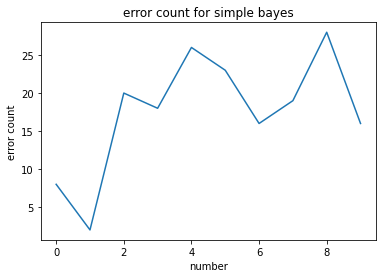

In [31]:
plt.plot([0,1,2,3,4,5,6,7,8,9],error_count1)
plt.title('error count for simple bayes')
plt.xlabel('number')
plt.ylabel('error count')


BernoulliNB

In [40]:
#train and test BernoulliNB and measure running time#

def create_BernoulliNB():
    bnl = BernoulliNB(alpha=1,binarize=0,fit_prior=True,class_prior=None).fit(X_train01, y_train)
    return bnl

def test_BernoulliNB():
    start = time.perf_counter()
    bnl = create_BernoulliNB()
    end = time.perf_counter()
    print("time for training Bernoulli bayes = %f" % (end-start))
    training_time.append((end-start))

    start = time.perf_counter()
    score = bnl.score(X_test01,y_test)
    end = time.perf_counter()
    print("time for testing Bernoulli bayes = %f" % (end-start))
    testing_data_time.append((end-start))
    testing_accuracy.append(score)
    print("testing data accuracy for Bernoulli bayes = %f" % score)


    start = time.perf_counter()
    score = bnl.score(X_train01,y_train)
    end = time.perf_counter()
    print("time for testing Bernoulli bayes = %f" % (end-start))
    training_data_time.append((end-start))
    training_accuracy.append(score)
    print("training data accuracy for Bernoulli bayes = %f" % score)


test_BernoulliNB()


time for training Bernoulli bayes = 0.058540
time for testing Bernoulli bayes = 0.015778
testing data accuracy for Bernoulli bayes = 0.795556
time for testing Bernoulli bayes = 0.041616
training data accuracy for Bernoulli bayes = 0.597183



MultinomialNB

In [41]:
#train and test MultinomialNB #

def create_MultinomialNB():
    # shrink to [0,1]
    Bayes = MultinomialNB(alpha=0.01).fit(x_minmax_training, y_train)
    return Bayes

def test_MultinomialNB():
    start = time.perf_counter()
    Bayes = create_MultinomialNB()
    end = time.perf_counter()
    print("time for training Multinomial bayes = %f" % (end-start))
    training_time.append((end-start))

    start = time.perf_counter()
    score = Bayes.score(x_minmax_testing,y_test)
    end = time.perf_counter()
    print("time for testing Multinomial bayes = %f" % (end-start))
    testing_data_time.append((end-start))
    testing_accuracy.append(score)
    print("testing data accuracy for Multinomial bayes = %f" % score)

    start = time.perf_counter()
    score = Bayes.score(x_minmax_training,y_train)
    end = time.perf_counter()
    print("time for testing Multinomial bayes = %f" % (end-start))
    training_data_time.append((end-start))
    training_accuracy.append(score)
    print("training data accuracy for Multinomial bayes = %f" % score)

test_MultinomialNB()


time for training Multinomial bayes = 0.022241
time for testing Multinomial bayes = 0.008477
testing data accuracy for Multinomial bayes = 0.804444
time for testing Multinomial bayes = 0.026169
training data accuracy for Multinomial bayes = 0.566901



GaussianNB

In [42]:
#train and test GaussianNB#

def create_GaussianNB():
    gnb = GaussianNB().fit(x_minmax_training,y_train)
    return gnb


def test_GaussianNB():
    start = time.perf_counter()
    gsb = create_GaussianNB()
    end = time.perf_counter()
    print("time for training Gaussian bayes = %f" % (end-start))
    training_time.append((end-start))


    start = time.perf_counter()
    score = gsb.score(x_minmax_testing,y_test)
    end = time.perf_counter()
    print("time for testing Gaussian bayes = %f" % (end-start))
    testing_data_time.append((end-start))
    testing_accuracy.append(score)
    print("testing data accuracy for Gaussian bayes = %f" % score)


    start = time.perf_counter()
    score = gsb.score(x_minmax_training,y_train)
    end = time.perf_counter()
    print("time for testing Gaussian bayes = %f" % (end-start))
    training_data_time.append((end-start))
    training_accuracy.append(score)
    print("training data accuracy for Gaussian bayes = %f" % score)

test_GaussianNB()

time for training Gaussian bayes = 0.047615
time for testing Gaussian bayes = 0.212460
testing data accuracy for Gaussian bayes = 0.410000
time for testing Gaussian bayes = 0.574582
training data accuracy for Gaussian bayes = 0.402465



print out Bayes classifiers performances

In [43]:
ghp_label = ['my_simple_bayes','BernoulliNB','MultinomialNB','GaussianNB']
tab = ["Bayes classifiers","training time(s)","testing training-set time(s)","training accuracy","testing testing-set time(s)","testing accuracy"]

M = []
for i in range(4):
    M.append([ghp_label[i],format(training_time[i], '.10f'),format(training_data_time[i], '.10f'),format(training_accuracy[i], '.10f'),format(testing_data_time[i], '.10f'),format(testing_accuracy[i], '.10f')])

from prettytable import PrettyTable
x= PrettyTable(tab)
for i in M:
    x.add_row(i)
print(x)

f = open('Naive_Bayes performance.txt','w')
f.write(str(x)+'\n')
f.close()

+-------------------+------------------+------------------------------+-------------------+-----------------------------+------------------+
| Bayes classifiers | training time(s) | testing training-set time(s) | training accuracy | testing testing-set time(s) | testing accuracy |
+-------------------+------------------+------------------------------+-------------------+-----------------------------+------------------+
|  my_simple_bayes  |   5.9606458000   |        156.1950747000        |    0.5971830986   |        54.5448183000        |   0.7955555556   |
|    BernoulliNB    |   0.0585398000   |         0.0416156000         |    0.5971830986   |         0.0157779000        |   0.7955555556   |
|   MultinomialNB   |   0.0222408000   |         0.0261693000         |    0.5669014085   |         0.0084770000        |   0.8044444444   |
|     GaussianNB    |   0.0476149000   |         0.5745815000         |    0.4024647887   |         0.2124597000        |   0.4100000000   |
+------------